## To predict whether customer is happy or not with the order

In [61]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import gender_guesser.detector as gender
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#loading the file 
file ="ACME-HappinessSurvey2020.csv"
df = pd.read_csv(file)
df.head(n=5)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [25]:
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [26]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


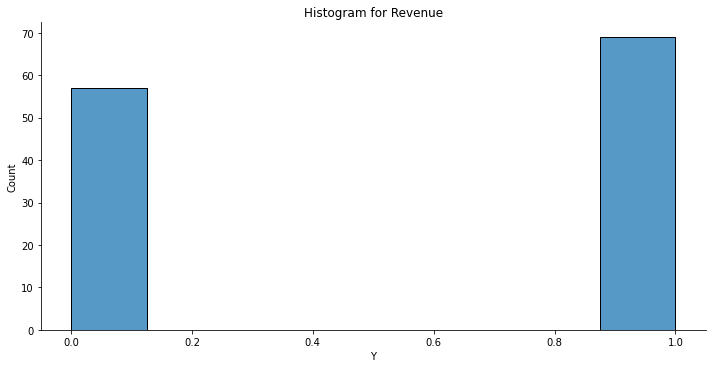

In [28]:
# developing a histogram using DISPLOT
sns.displot(data   = df,
            x      = 'Y',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.title("Histogram for Revenue")
plt.show()

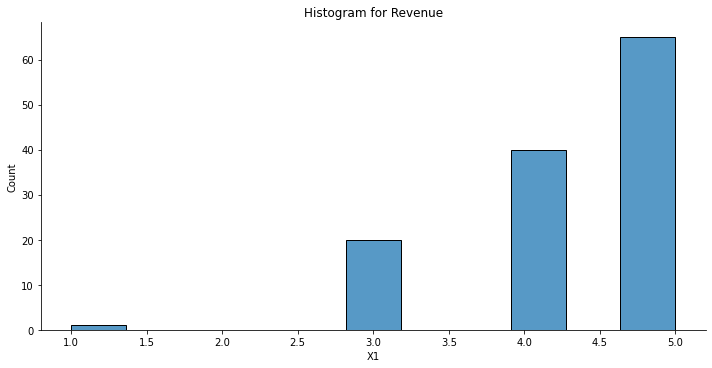

In [29]:
# developing a histogram using DISPLOT
sns.displot(data   = df,
            x      = 'X1',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.title("Histogram for Revenue")
plt.show()

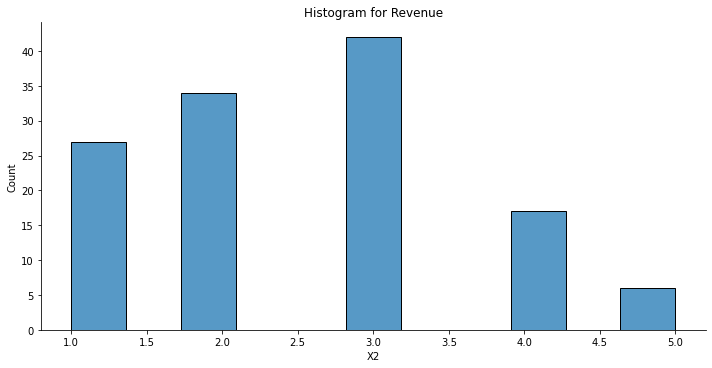

In [30]:
# developing a histogram using DISPLOT
sns.displot(data   = df,
            x      = 'X2',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.title("Histogram for Revenue")
plt.show()

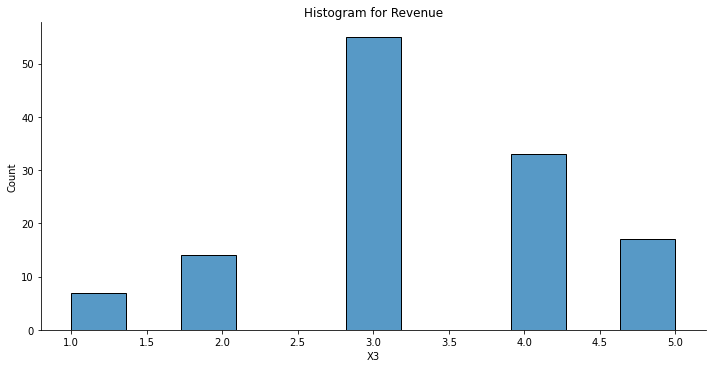

In [31]:
# developing a histogram using DISPLOT
sns.displot(data   = df,
            x      = 'X3',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.title("Histogram for Revenue")
plt.show()

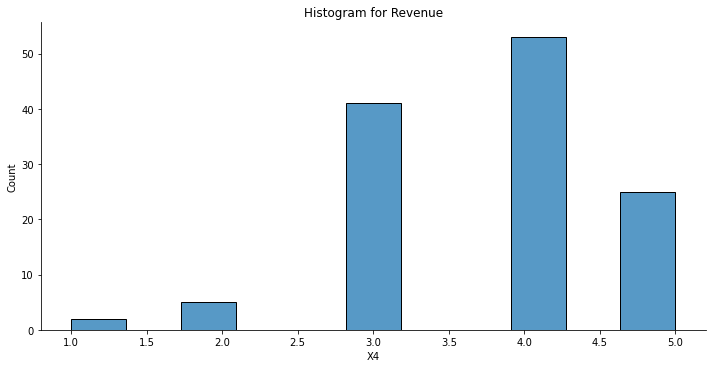

In [32]:
# developing a histogram using DISPLOT
sns.displot(data   = df,
            x      = 'X4',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.title("Histogram for Revenue")
plt.show()

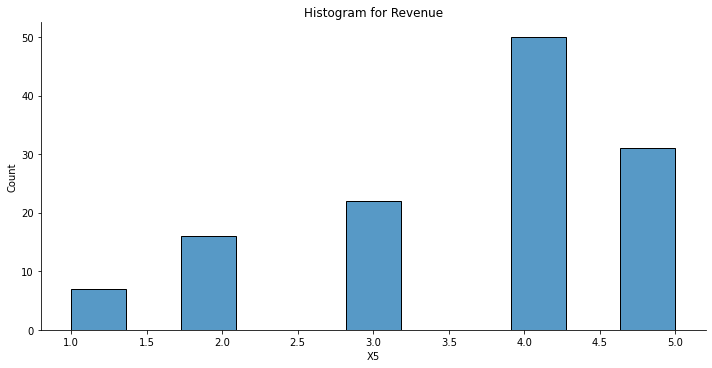

In [33]:
# developing a histogram using DISPLOT
sns.displot(data   = df,
            x      = 'X5',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.title("Histogram for Revenue")
plt.show()

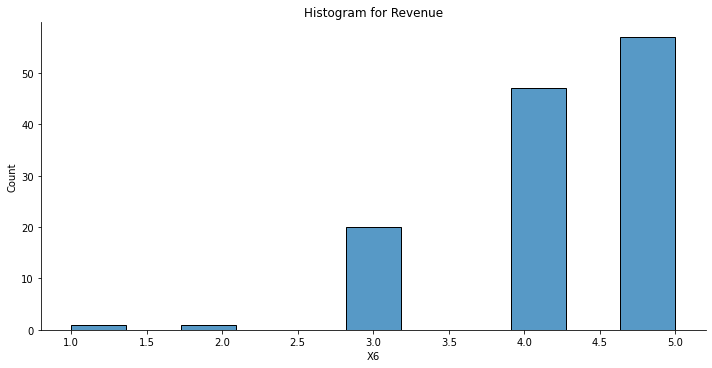

In [34]:
# developing a histogram using DISPLOT
sns.displot(data   = df,
            x      = 'X6',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.title("Histogram for Revenue")
plt.show()

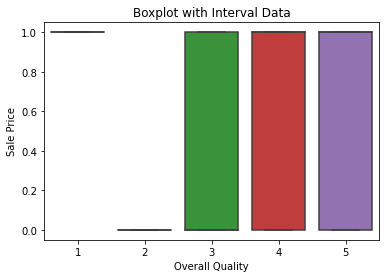

In [35]:
# developing a boxplot
sns.boxplot(x    = 'X6',
            y    = 'Y',
            data = df)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'Overall Quality')
plt.ylabel(ylabel = 'Sale Price')


# displaying the plot
plt.show()

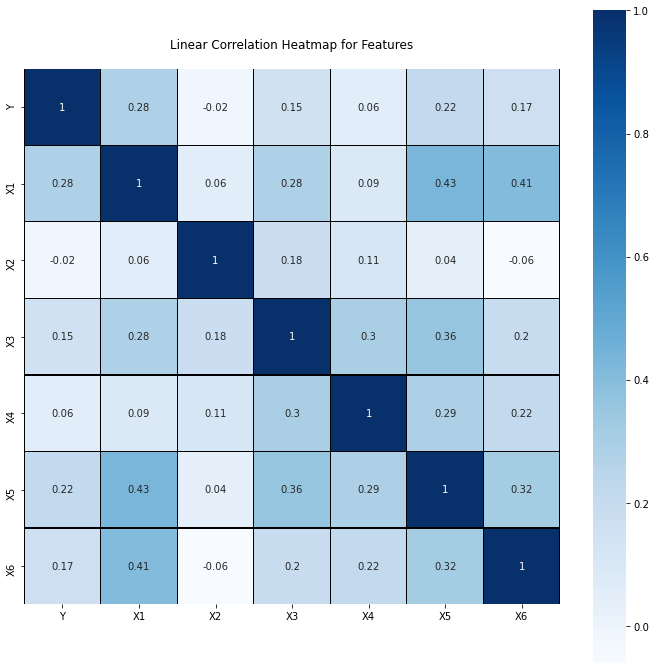

In [55]:
# creating a (Pearson) correlation matrix
df_corr = df.corr().round(2)
fig, ax = plt.subplots(figsize=(12,12))


# developing a spicy heatmap
sns.heatmap(data       = df_corr, # the correlation matrix
            cmap       = 'Blues',     # changing to COOL colors
            square     = True,          # tightening the layout
            annot      = True,          # should there be numbers in the heatmap
            linecolor  = 'black',       # lines between boxes
            linewidths = 0.25)          # how thick should the lines be?


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for Features
""")


plt.show()

#### CREATE MOTE OG BOX PLOTS 

MODELS

LINEAR MODEL

## train test split

In [40]:
# preparing explanatory variable data
df_data   = df.drop(['Y'],axis = 1)


# preparing response variables
df_target = df.loc[ : , 'Y']

# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size = 0.25)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (94, 6)
y-side: (94,)


Testing Data
------------
X-side: (32, 6)
y-side: (32,)



In [54]:
# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy
print(logreg_train_score-logreg_test_score)

Training ACCURACY: 0.5
Testing  ACCURACY: 0.8125
-0.3125


## Confusion Matrix

In [56]:
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[10  1]
 [ 5 16]]


In [57]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 10
False Positives: 1
False Negatives: 5
True Positives : 16



In [59]:
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

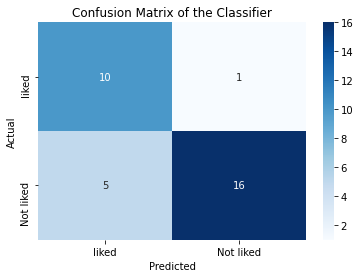

In [60]:
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['liked', 'Not liked'])